**Installing and Importing Libraries**

In [ ]:
# Install the necessary libraries 
!pip install pandas scikit-learn matplotlib seaborn

# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**Reading the Data**

In [3]:
# Load the CSV file into a DataFrame
file_path = 'Housing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Data Exploration and Cleaning**

In [4]:
# Check for missing values
data.info()

# Check statistical summary of the dataset
data.describe()

# Convert categorical features to numerical (e.g., mainroad, guestroom, etc.)
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

# Handle 'furnishingstatus' column using one-hot encoding
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# Check if there are any missing values after encoding
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

**Feature Selection**

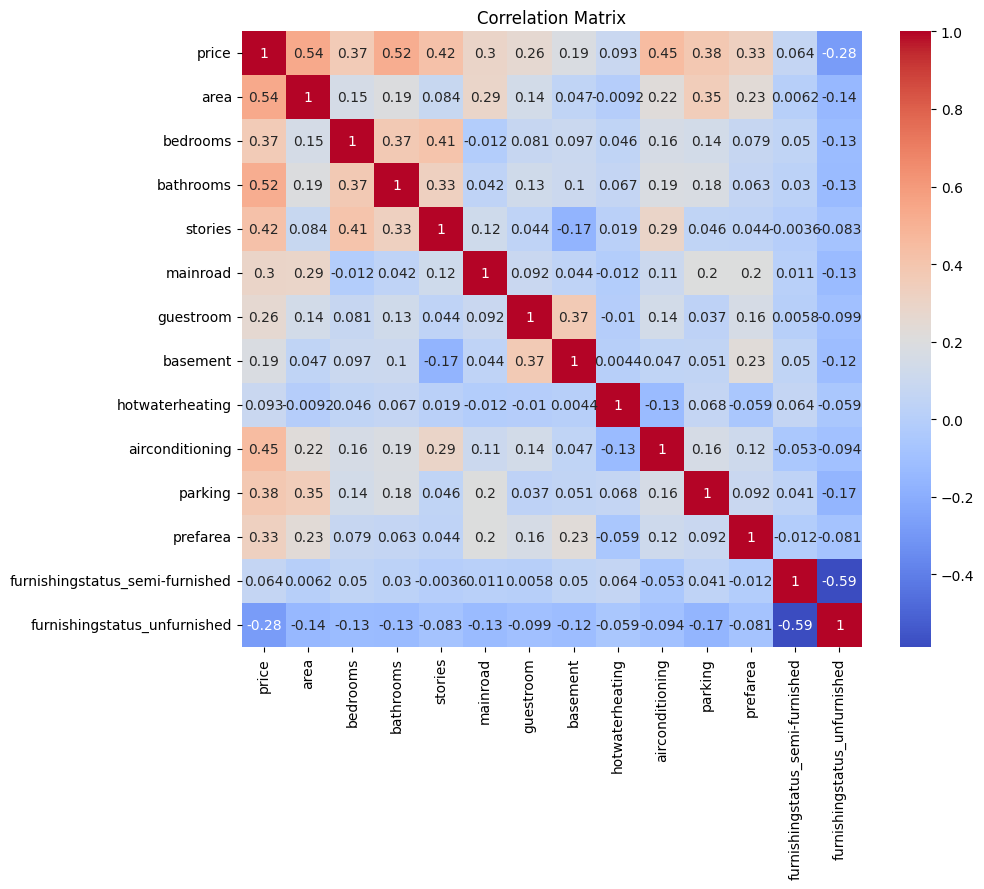

In [5]:
# Define the independent variables (features) and dependent variable (target)
X = data.drop('price', axis=1)  # Features (excluding price)
y = data['price']  # Target variable

# Display correlation matrix to understand feature importance
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Splitting Data into Training and Testing Sets**

In [6]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(436, 13) (109, 13) (436,) (109,)


**Model Training using Linear Regression**

In [7]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Model coefficients (weights) and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Model Intercept: 260032.35760741308


**Model Evaluation**

In [8]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 1754318687330.6633
Root Mean Squared Error (RMSE): 1324506.9600914384
R-squared (R2) Score: 0.6529242642153185


**Visualization of Actual vs Predicted Values**

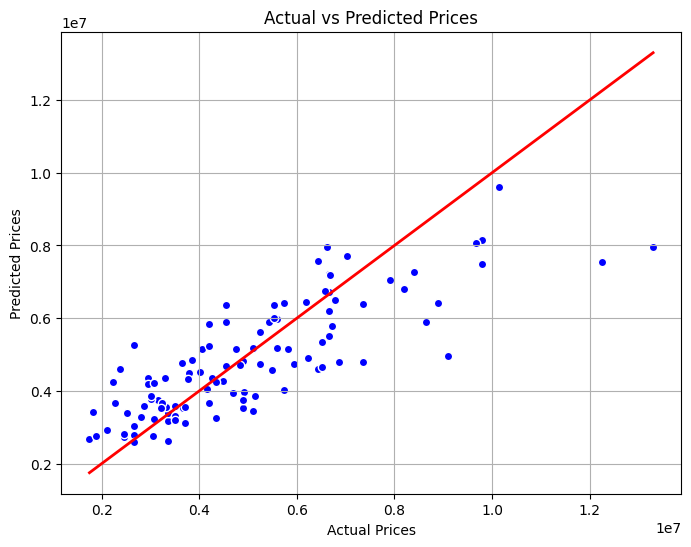

In [9]:
# Create a scatter plot to compare actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


**Residual Plot**

In [ ]:
pip install statsmodels


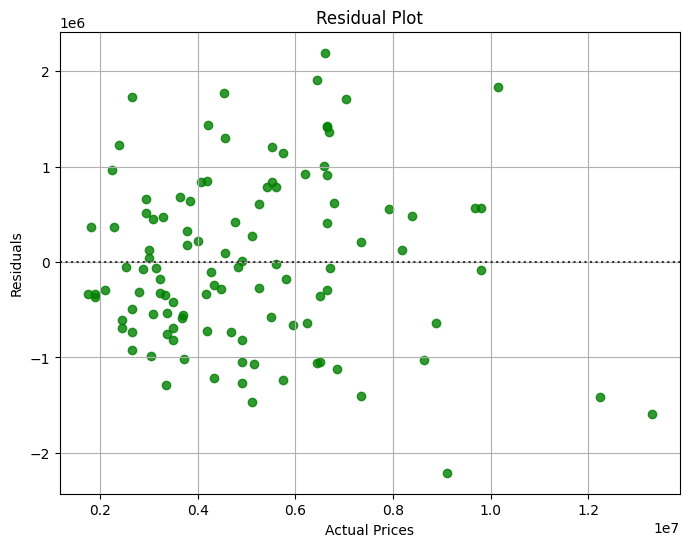

In [14]:
# Plot the residuals (errors) without lowess
plt.figure(figsize=(8,6))
sns.residplot(x=y_test, y=y_pred, color='green', line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler

# Apply scaling to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Cross-Validation**

In [16]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Display cross-validation results
print("Cross-Validation MSE Scores:", -cross_val_scores)
print("Average MSE from Cross-Validation:", -cross_val_scores.mean())


Cross-Validation MSE Scores: [6.85881616e+12 9.52137928e+11 8.73716064e+11 8.68982894e+11
 1.04858231e+12]
Average MSE from Cross-Validation: 2120447069698.9968


**Regularization: Ridge and Lasso Regression**

In [17]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can tune the 'alpha' parameter
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.01)  # You can tune the 'alpha' parameter
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

# Evaluate Ridge and Lasso
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print("Ridge RMSE:", ridge_rmse)
print("Lasso RMSE:", lasso_rmse)


Ridge RMSE: 1324703.4866138187
Lasso RMSE: 1324506.9650062919


**Polynomial Regression**

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train linear regression on polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = model_poly.predict(X_test_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", poly_rmse)


Polynomial Regression RMSE: 1384371.4733315161


**Grid Search for Hyperparameter Tuning**

In [19]:
from sklearn.model_selection import GridSearchCV

# Grid Search for Ridge
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best cross-validation score for Ridge:", -ridge_grid.best_score_)

# Similar grid search can be done for Lasso


Best parameters for Ridge: {'alpha': 10}
Best cross-validation score for Ridge: 1059768849845.4545


**Advanced Error Analysis: Residual Distribution**

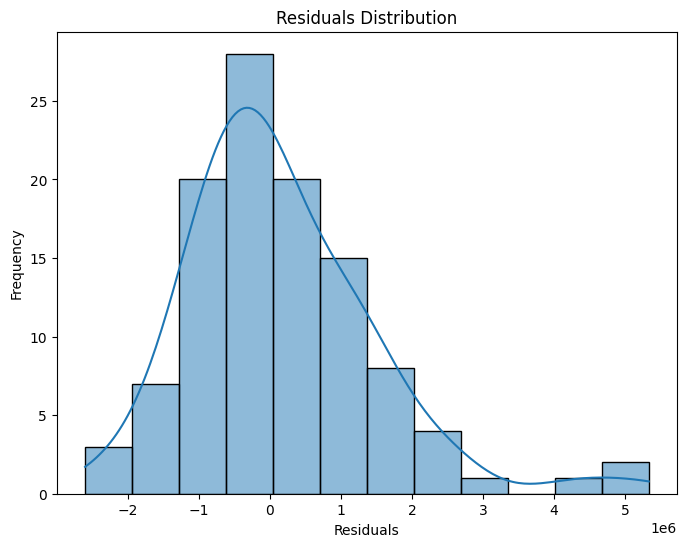

In [20]:
# Plot distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


**Outlier Detection**

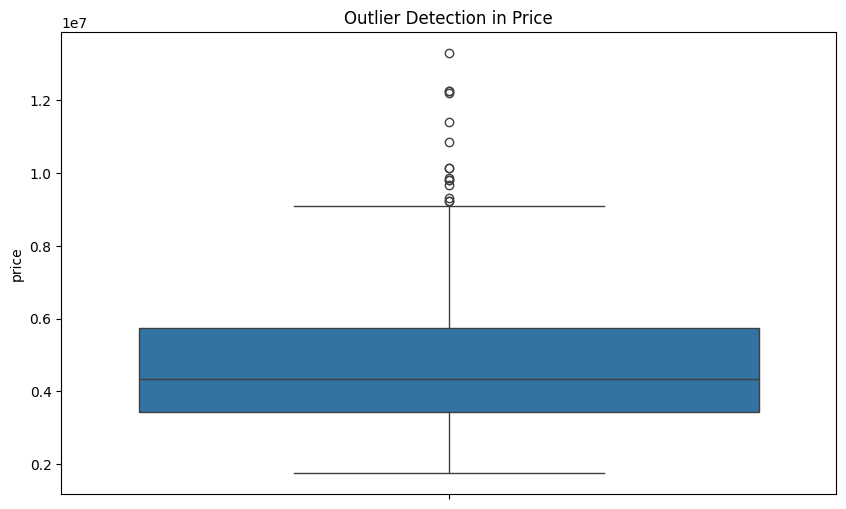

In [22]:
# Plot to detect outliers using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data['price'])
plt.title('Outlier Detection in Price')
plt.show()




**Interaction Terms**

In [24]:
# Create interaction terms between features (optional, depending on our dataset)
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interaction = interaction.fit_transform(X_train)
X_test_interaction = interaction.transform(X_test)

# Train linear regression on interaction terms
model_interaction = LinearRegression()
model_interaction.fit(X_train_interaction, y_train)

# Predict and evaluate
y_pred_interaction = model_interaction.predict(X_test_interaction)
interaction_rmse = np.sqrt(mean_squared_error(y_test, y_pred_interaction))
print("Interaction Model RMSE:", interaction_rmse)


Interaction Model RMSE: 1392991.5070606756


**Save and Load Model**

In [25]:
import joblib

# Save the trained model
joblib.dump(model, 'house_price_model.pkl')

# Load the model when needed
loaded_model = joblib.load('house_price_model.pkl')


**Pairplot**

In [27]:
print(data.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')


In [28]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()


In [29]:
# Example of loading data
import pandas as pd

data = pd.read_csv('Housing.csv')  # Adjust the filename accordingly


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


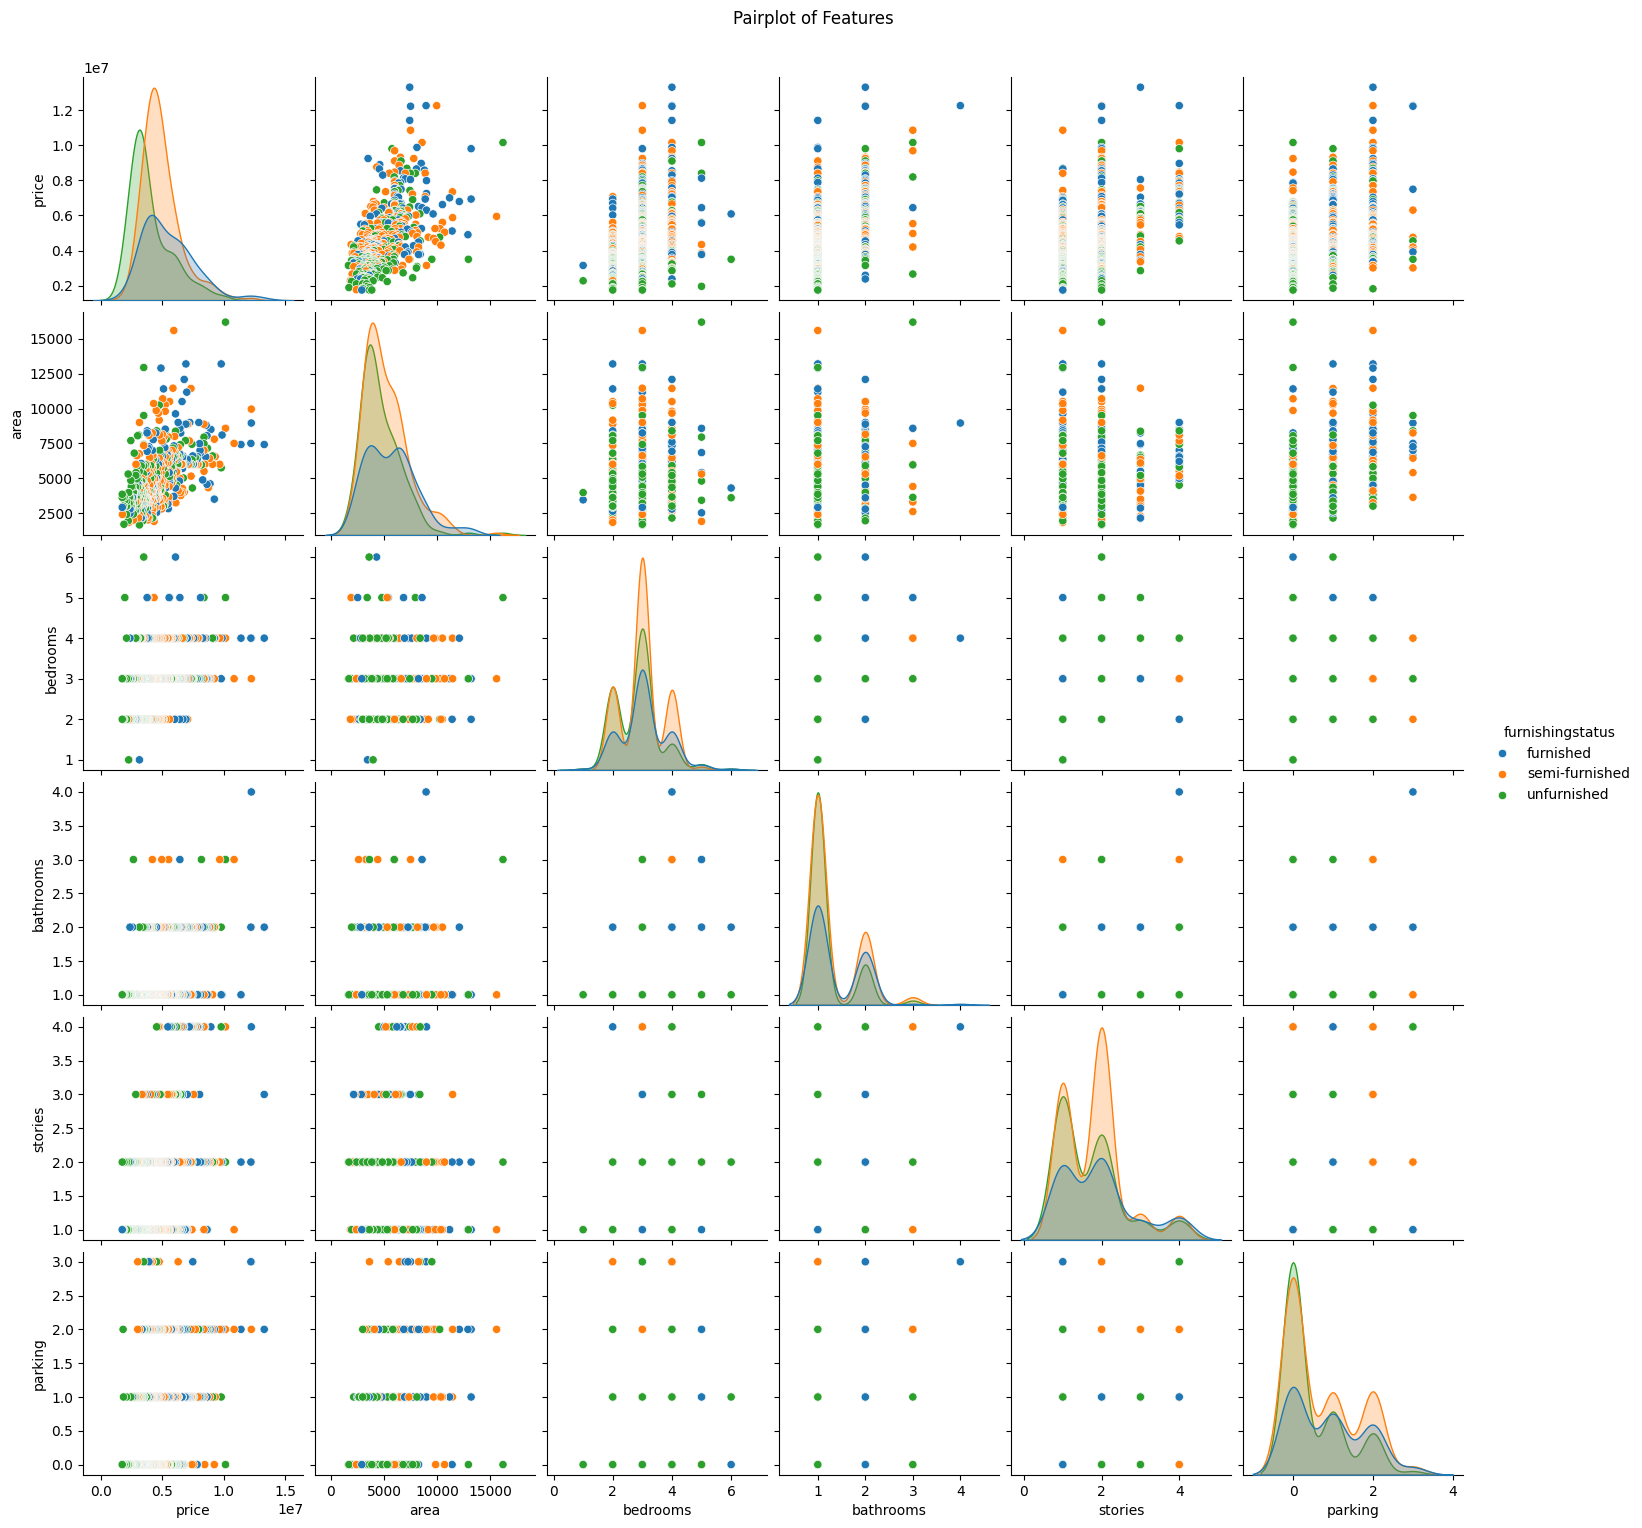

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verify column names
print(data.columns)

# If everything looks good, create the pairplot
sns.pairplot(data, diag_kind='kde', hue='furnishingstatus')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


**Correlation Heatmap**

In [32]:
print(data.dtypes)


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [33]:
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)


In [34]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding a single column
label_encoder = LabelEncoder()
data['furnishingstatus'] = label_encoder.fit_transform(data['furnishingstatus'])


In [35]:
# Calculate the correlation matrix for the encoded data
correlation_matrix = data_encoded.corr()


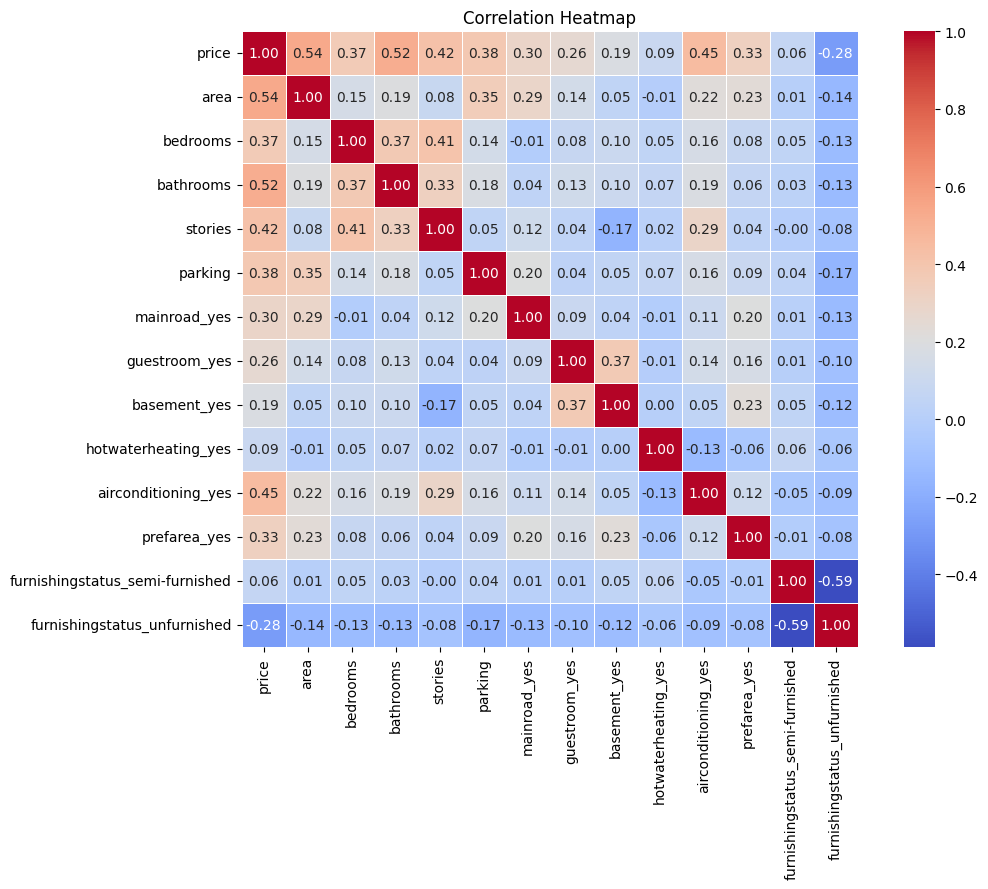

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


**Bar Graphs**

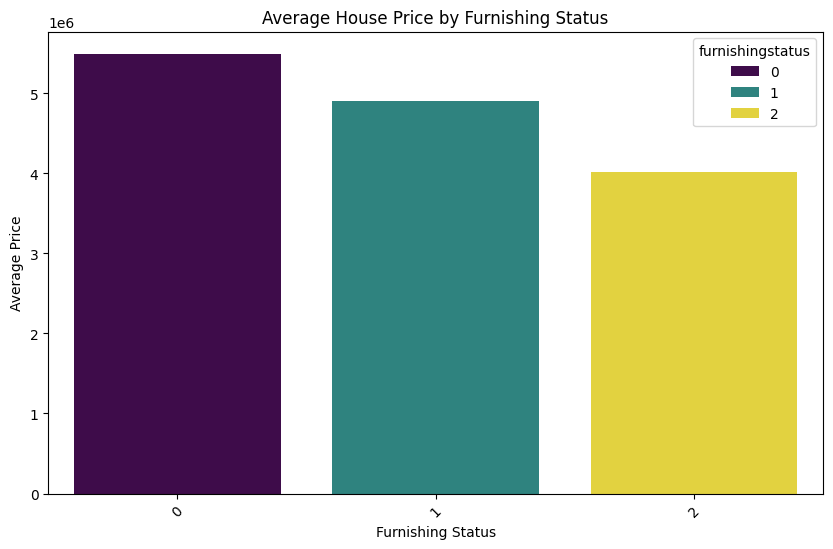

In [38]:
# Average price by furnishing status
avg_price_furnishing = data.groupby('furnishingstatus')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_furnishing.index, y=avg_price_furnishing.values, hue=avg_price_furnishing.index, palette='viridis')
plt.title('Average House Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


**Pie Chart for Categorical Distribution**

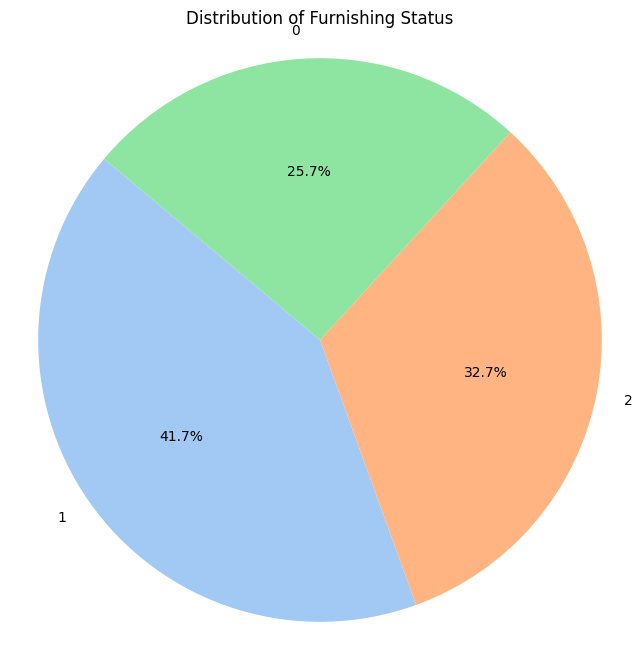

In [39]:
# Pie chart for furnishing status distribution
furnishing_counts = data['furnishingstatus'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(furnishing_counts, labels=furnishing_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Furnishing Status')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


**Box Plot for Price Distribution**

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


C:\Users\MATHAN\AppData\Local\Temp\ipykernel_10504\3944122705.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=data, palette='Set1')


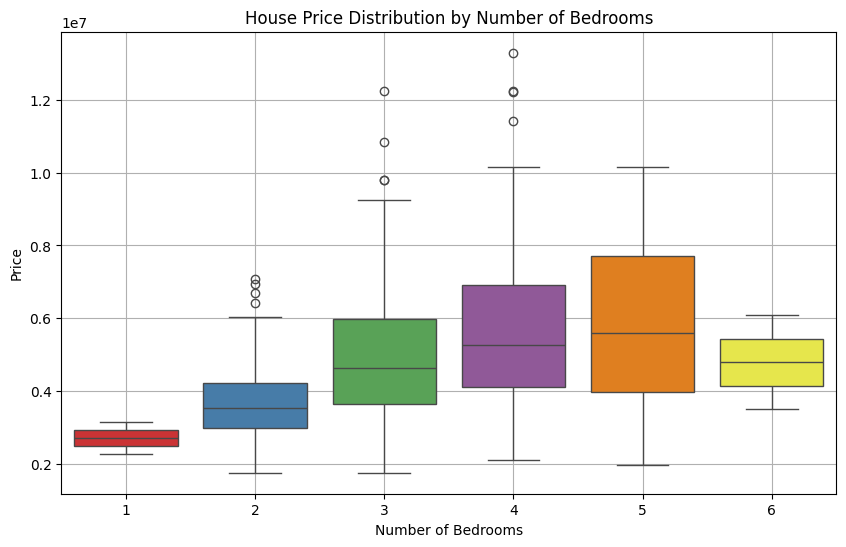

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Housing.csv')  # Replace with our actual file path

# Check if 'bedrooms' and 'price' columns exist
print(data.head())

# Box plot for house prices based on the number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=data, palette='Set1')
plt.title('House Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**Swarm Plot for Detailed Distribution**

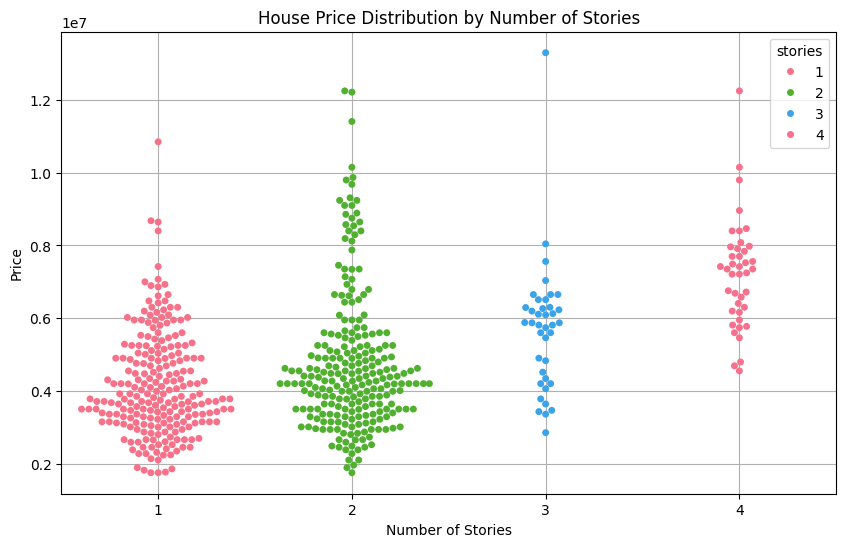

In [43]:
# Swarm plot for house prices based on number of stories
plt.figure(figsize=(10, 6))
sns.swarmplot(x='stories', y='price', data=data, hue= 'stories', palette='husl')
plt.title('House Price Distribution by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**Facet Grid for Multiple Plots**

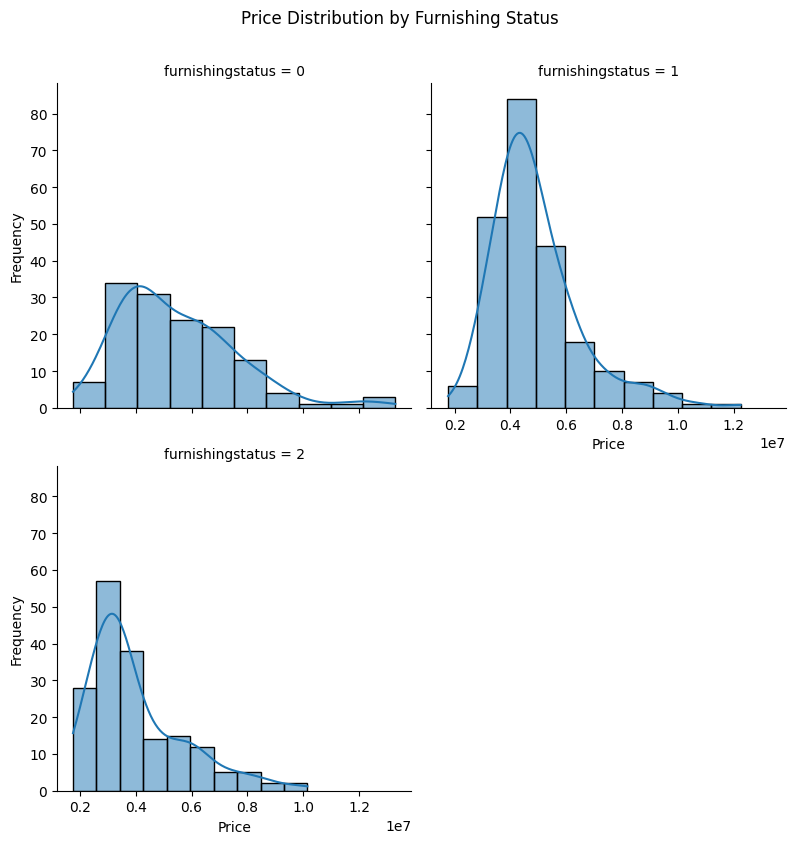

In [44]:
g = sns.FacetGrid(data, col='furnishingstatus', col_wrap=2, height=4)
g.map(sns.histplot, 'price', kde=True, bins=10)
g.add_legend()
g.set_axis_labels('Price', 'Frequency')
g.fig.suptitle('Price Distribution by Furnishing Status', y=1.05)
plt.show()


**Joint Plot for Feature Relationships**

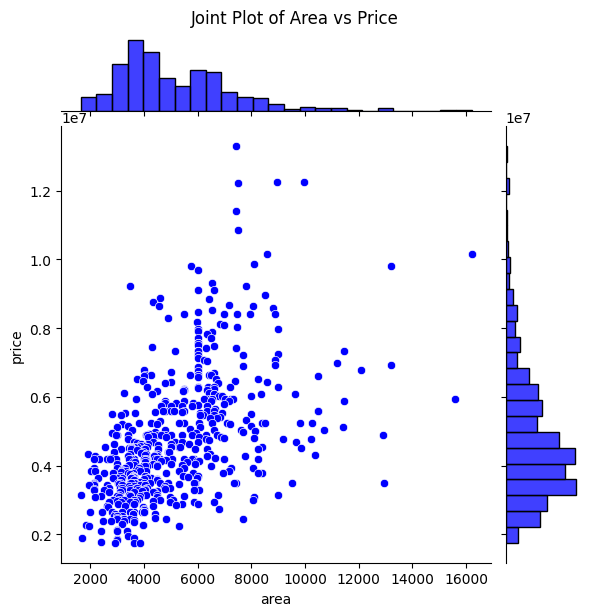

In [45]:
# Joint plot for area vs price
sns.jointplot(x='area', y='price', data=data, kind='scatter', color='blue', marginal_kws=dict(bins=25, fill=True))
plt.suptitle('Joint Plot of Area vs Price', y=1.02)
plt.show()


**Radar Chart for Comparative Analysis**

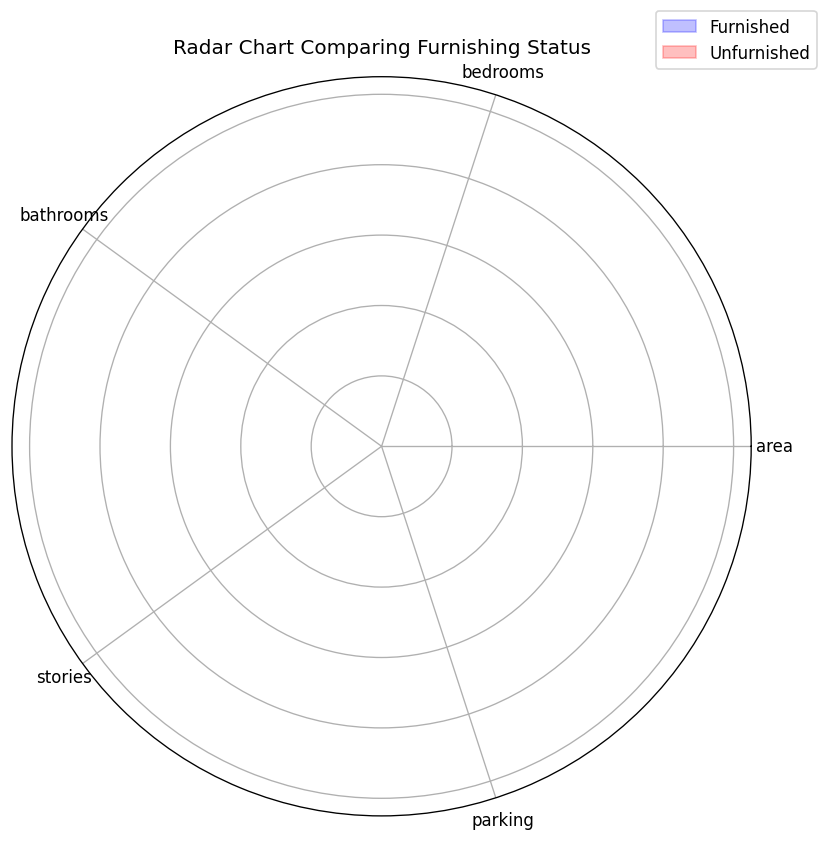

In [46]:
import numpy as np

# Sample data
labels = np.array(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'])
furnishing_statuses = ['Furnished', 'Unfurnished']

# Calculate average values for each furnishing status
avg_values = [data[data['furnishingstatus'] == status][labels].mean().values for status in furnishing_statuses]

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
avg_values = np.array(avg_values)

# Complete the loop
avg_values = np.concatenate((avg_values, avg_values[:,[0]]), axis=1)
angles += angles[:1]

# Plotting
plt.figure(figsize=(8, 8), dpi=120)
ax = plt.subplot(111, polar=True)
ax.fill(angles, avg_values[0], color='blue', alpha=0.25)
ax.fill(angles, avg_values[1], color='red', alpha=0.25)
ax.set_yticklabels([])  # Remove the radial ticks
ax.set_xticks(angles[:-1])  # Set the labels
ax.set_xticklabels(labels)
plt.title('Radar Chart Comparing Furnishing Status')
plt.legend(furnishing_statuses, loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()
